# Análise Exploratória de Dados e Modelagem Preditiva de Preços Diários da Soja no Brasil

## Objetivo do Projeto
Desenvolver um modelo de Machine Learning (Regressão Linear) capaz de prever o preço diário da soja, utilizando dados históricos reais.

## Contexto e Justificativa
O setor de agronegócio é fundamental para a economia, e a flutuação dos preços de commodities como a soja impacta diretamente a cadeia produtiva. Este projeto visa aplicar conceitos de Ciência de Dados e Machine Learning para analisar e prever o comportamento desses preços, servindo como base para futuras análises de mercado e tomada de decisão.

## Dados Disponíveis
* **Nome do Arquivo:** `preco_soja_10anos.xlsx`
* **Formato:** Arquivo Excel (.xlsx)
* **Conteúdo:** Dados diários de preços da soja desde 2015.
* **Estrutura das Colunas:**
    * `Data`: Data da observação (formato de data).
    * `Preço`: Preço da soja no dia (formato numérico).
* **Status:** Os dados já estão tratados (sem valores ausentes significativos ou erros de formato que impeçam a leitura inicial).

## Tecnologias e Bibliotecas Requeridas
* **Linguagem de Programação:** Python
* **Bibliotecas Principais:**
    * `pandas` (para manipulação e análise de dados)
    * `numpy` (para operações numéricas)
    * `matplotlib` e `seaborn` (para visualização de dados)
    * `scikit-learn` (para Machine Learning - `LinearRegression`, `train_test_split`, e métricas de regressão)

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

nome_arquivo = 'preco_soja_10anos.xlsx'
df = pd.read_excel(nome_arquivo, decimal = ',')

df['Data'] = pd.to_datetime(df['Data'])
df['Preço'] = pd.to_numeric(df['Preço'])

print(df.head())

        Data  Preço
0 2015-05-26  61.66
1 2015-05-27  62.29
2 2015-05-28  62.32
3 2015-05-29  62.96
4 2015-06-01  62.46


<ipython-input-24-fb767c00b514>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])



Primeiras 5 linhas do DataFrame:
        Data  Preço
0 2015-05-26  61.66
1 2015-05-27  62.29
2 2015-05-28  62.32
3 2015-05-29  62.96
4 2015-06-01  62.46

Últimas 5 linhas do DataFrame:
           Data   Preço
2487 2025-05-19  127.56
2488 2025-05-20  127.66
2489 2025-05-21  128.42
2490 2025-05-22  128.15
2491 2025-05-23  128.69



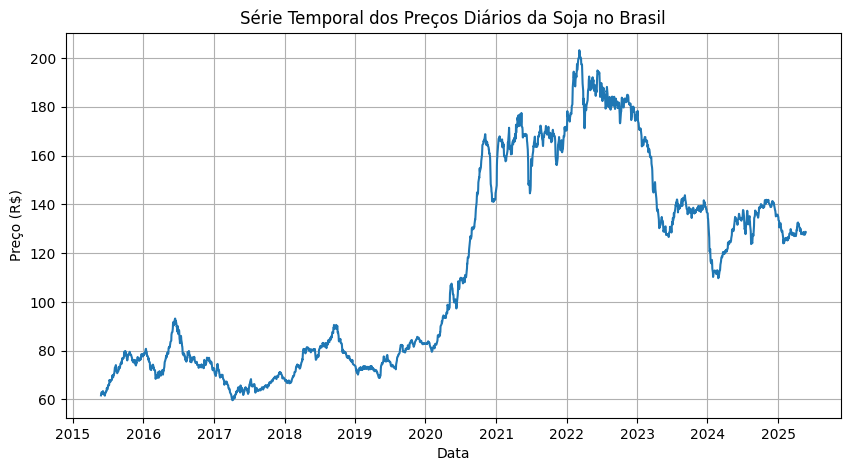

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nPrimeiras 5 linhas do DataFrame:")
print(df.head())

print("\nÚltimas 5 linhas do DataFrame:")
print(df.tail())
print("")

# Visualizar a série temporal dos preços da soja
plt.figure(figsize=(10, 5))
sns.lineplot(x='Data', y='Preço', data=df)
plt.title('Série Temporal dos Preços Diários da Soja no Brasil')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df['Mes'] = df['Data'].dt.month
df['Dia_do_Ano'] = df['Data'].dt.dayofyear
df['Ano'] = df['Data'].dt.year
df['Dia_da_Semana'] = df['Data'].dt.dayofweek # 0 para Segunda-feira, 6 para Domingo.

df = df.sort_values(by='Data')

df['Preco_Ontem'] = df['Preço'].shift(1)
df['Preco_2_Dias_Atras'] = df['Preço'].shift(2)
df['Preco_7_Dias_Atras'] = df['Preço'].shift(7)

print("Número de linhas antes de remover NaNs:", len(df))
df.dropna(inplace=True)
print("Número de linhas depois de remover NaNs:", len(df))

print("\nDataFrame com novas features (primeiras 5 linhas após NaNs removidos):")
print(df.head())

Número de linhas antes de remover NaNs: 2492
Número de linhas depois de remover NaNs: 2485

DataFrame com novas features (primeiras 5 linhas após NaNs removidos):
         Data  Preço  Mes  Dia_do_Ano   Ano  Dia_da_Semana  Preco_Ontem  \
7  2015-06-05  63.42    6         156  2015              4        62.40   
8  2015-06-08  62.27    6         159  2015              0        63.42   
9  2015-06-09  62.38    6         160  2015              1        62.27   
10 2015-06-10  62.28    6         161  2015              2        62.38   
11 2015-06-11  62.52    6         162  2015              3        62.28   

    Preco_2_Dias_Atras  Preco_7_Dias_Atras  
7                62.56               61.66  
8                62.40               62.29  
9                63.42               62.32  
10               62.27               62.96  
11               62.38               62.46  


In [ ]:
from sklearn.model_selection import train_test_split

features = ['Mes', 'Dia_do_Ano', 'Ano', 'Dia_da_Semana',
            'Preco_Ontem', 'Preco_2_Dias_Atras', 'Preco_7_Dias_Atras']

X = df[features]
y = df['Preço']

print("Variáveis preditoras (X) - Primeiras 5 linhas:")
print(X.head())
print("\nVariável alvo (y) - Primeiras 5 linhas:")
print(y.head())

# 80% dos dados para treino
train_size = int(len(df) * 0.8)

X_treino = X[:train_size]
X_teste = X[train_size:]
y_treino = y[:train_size]
y_teste = y[train_size:]

print(f"\nTamanho do conjunto de treino (X_treino): {len(X_treino)} amostras")
print(f"Tamanho do conjunto de teste (X_teste): {len(X_teste)} amostras")
print(f"Tamanho do conjunto de treino (y_treino): {len(y_treino)} amostras")
print(f"Tamanho do conjunto de teste (y_teste): {len(y_teste)} amostras")

Variáveis preditoras (X) - Primeiras 5 linhas:
    Mes  Dia_do_Ano   Ano  Dia_da_Semana  Preco_Ontem  Preco_2_Dias_Atras  \
7     6         156  2015              4        62.40               62.56   
8     6         159  2015              0        63.42               62.40   
9     6         160  2015              1        62.27               63.42   
10    6         161  2015              2        62.38               62.27   
11    6         162  2015              3        62.28               62.38   

    Preco_7_Dias_Atras  
7                61.66  
8                62.29  
9                62.32  
10               62.96  
11               62.46  

Variável alvo (y) - Primeiras 5 linhas:
7     63.42
8     62.27
9     62.38
10    62.28
11    62.52
Name: Preço, dtype: float64

Tamanho do conjunto de treino (X_treino): 1988 amostras
Tamanho do conjunto de teste (X_teste): 497 amostras
Tamanho do conjunto de treino (y_treino): 1988 amostras
Tamanho do conjunto de teste (y_teste): 497 a

In [ ]:
from sklearn.linear_model import LinearRegression

modelo_regressao_linear = LinearRegression()
modelo_regressao_linear.fit(X_treino, y_treino)
print("Treinamento do modelo concluído!")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_previsao = modelo_regressao_linear.predict(X_teste)

# Calcular as métricas de avaliação
mae = mean_absolute_error(y_teste, y_previsao)
mse = mean_squared_error(y_teste, y_previsao)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_previsao)

print(f"\n--- Métricas de Avaliação do Modelo ---")
print("")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (R-squared score): {r2:.4f}")

print("\n Foco = 1.0")
print("\n--- Interpretação das Métricas ---")
print(f"- MAE ({mae:.2f}): Em média, a diferença absoluta entre o preço real e o preço previsto é de R$ {mae:.2f}.")
print(f"- MSE ({mse:.2f}): Penaliza erros maiores. Não é tão intuitivo quanto o MAE para interpretar diretamente em R$, mas é útil para otimização.")
print(f"- RMSE ({rmse:.2f}): Representa o erro médio das previsões na mesma unidade da variável alvo (R$). Nosso modelo erra, em média, R$ {rmse:.2f} para mais ou para menos.")
print(f"- R² ({r2:.4f}): Indica a proporção da variância na variável alvo que é explicada pelo modelo. Um R² de {r2:.4f} significa que o modelo explica aproximadamente {r2*100:.2f}% da variabilidade dos preços da soja.")


--- Métricas de Avaliação do Modelo ---

MAE (Mean Absolute Error): 0.72
MSE (Mean Squared Error): 0.89
RMSE (Root Mean Squared Error): 0.95
R² (R-squared score): 0.9857

 Foco = 1.0

--- Interpretação das Métricas ---
- MAE (0.72): Em média, a diferença absoluta entre o preço real e o preço previsto é de R$ 0.72.
- MSE (0.89): Penaliza erros maiores. Não é tão intuitivo quanto o MAE para interpretar diretamente em R$, mas é útil para otimização.
- RMSE (0.95): Representa o erro médio das previsões na mesma unidade da variável alvo (R$). Nosso modelo erra, em média, R$ 0.95 para mais ou para menos.
- R² (0.9857): Indica a proporção da variância na variável alvo que é explicada pelo modelo. Um R² de 0.9857 significa que o modelo explica aproximadamente 98.57% da variabilidade dos preços da soja.


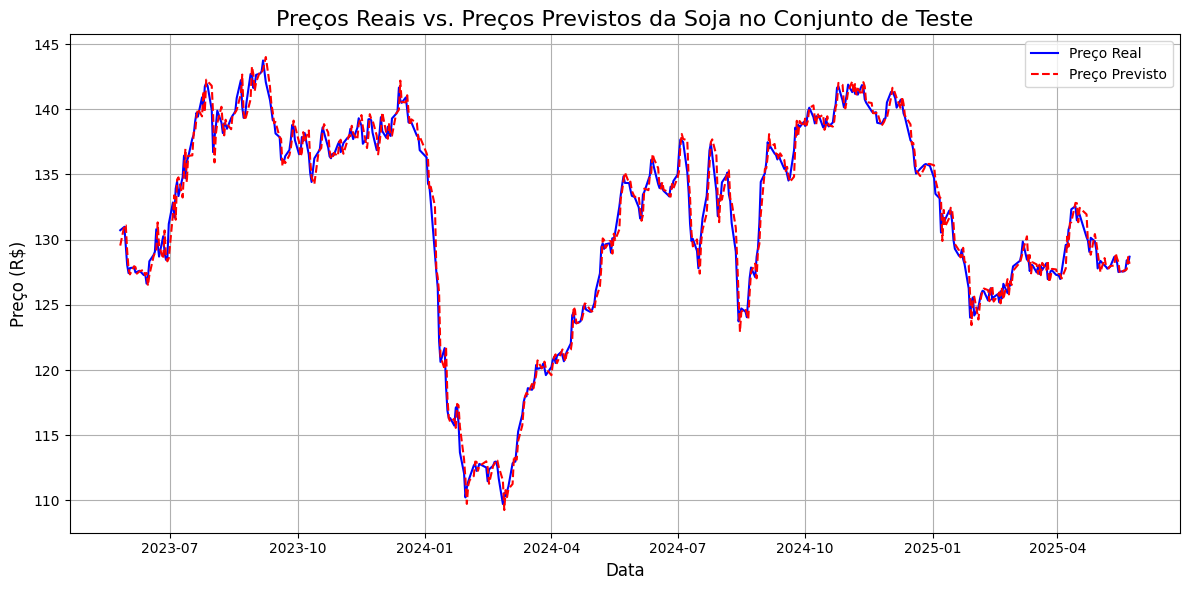

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_resultado = pd.DataFrame({
    'Data': df['Data'][len(X_treino):].reset_index(drop=True), # Pegar as datas correspondentes ao X_teste
    'Preco_Real': y_teste.reset_index(drop=True),
    'Preco_Previsto': y_previsao})

plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Preco_Real', data=df_resultado, label='Preço Real', color='blue')
sns.lineplot(x='Data', y='Preco_Previsto', data=df_resultado, label='Preço Previsto', color='red', linestyle='--')

plt.title('Preços Reais vs. Preços Previstos da Soja no Conjunto de Teste', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (R$)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()